<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Complete_Simplified_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Feature Selection

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [60]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
from IPython.display import display

data1 = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
df = data1.loc[data1['specific_disorder'].isin(['Behavioral addiction disorder', 'Healthy control'])].copy()

conditioned = df[df['specific_disorder'] == 'Behavioral addiction disorder']
control = df[df['specific_disorder'] == 'Healthy control']
total = pd.concat([conditioned, control])

n_conditioned = len(conditioned)
n_control = len(control)
n_total = len(total)

percent_women_conditioned = (conditioned['sex'] == 'F').mean() * 100
percent_women_control = (control['sex'] == 'F').mean() * 100
percent_women_total = (total['sex'] == 'F').mean() * 100

age_avg_conditioned = conditioned['age'].mean()
age_avg_control = control['age'].mean()
age_avg_total = total['age'].mean()

IQ_avg_conditioned = conditioned['IQ'].mean()
IQ_avg_control = control['IQ'].mean()
IQ_avg_total = total['IQ'].mean()

education_avg_conditioned = conditioned['education'].mean()
education_avg_control = control['education'].mean()
education_avg_total = total['education'].mean()

p_age = ttest_ind(conditioned['age'], control['age'], equal_var=False).pvalue
p_IQ = ttest_ind(conditioned['IQ'].dropna(), control['IQ'].dropna(), equal_var=False).pvalue
p_edu = ttest_ind(conditioned['education'].dropna(), control['education'].dropna(), equal_var=False).pvalue

contingency = pd.crosstab(df['specific_disorder'], df['sex'])
_, p_sex, _, _ = chi2_contingency(contingency)

index_order = ['N', 'Women (%)', 'Age (mean)', 'IQ (mean)', 'Education in years (mean)']

summary_df = pd.DataFrame({
    'Control': [n_control, percent_women_control, age_avg_control, IQ_avg_control, education_avg_control],
    'Conditioned': [n_conditioned, percent_women_conditioned, age_avg_conditioned, IQ_avg_conditioned, education_avg_conditioned],
    'Total': [n_total, percent_women_total, age_avg_total, IQ_avg_total, education_avg_total],
    'p-value': [
        '',
        'P<0.001' if p_sex < 0.001 else f'P={p_sex:.2f}',
        f'P={p_age:.2f}',
        'P<0.001' if p_IQ < 0.001 else f'P={p_IQ:.2f}',
        'P<0.001' if p_edu < 0.001 else f'P={p_edu:.2f}'
    ]
}, index=index_order)

styled_df = summary_df.style \
    .format({'Control': '{:.2f}', 'Conditioned': '{:.2f}', 'Total': '{:.2f}'}) \
    .set_table_styles([
        {
            'selector': 'thead th',
            'props': [
                ('border-top', '2px solid black'),
                ('border-bottom', '2px solid black'),
                ('background-color', 'white'),
                ('text-align', 'center'),
                ('padding', '6px')
            ]
        },
        {
            'selector': 'tbody td',
            'props': [
                ('border', 'none'),
                ('background-color', 'white'),
                ('text-align', 'center'),
                ('padding', '6px')
            ]
        },
        {
            'selector': 'tbody th',
            'props': [
                ('border', 'none'),
                ('background-color', 'white'),
                ('text-align', 'center'),
                ('padding', '6px')
            ]
        },
        {
            'selector': 'tbody tr:last-child',
            'props': [('border-bottom', '2px solid black')]
        },
        {
            'selector': '',
            'props': [('border', 'none')]
        }
    ]) \
    .set_caption("Group Comparison")

display(styled_df)


,Control,Conditioned,Total,p-value
N,95.00,93.00,188.00,
Women (%),36.84,4.30,20.74,P<0.001
Age (mean),25.72,25.09,25.41,P=0.49
IQ (mean),116.24,104.38,110.47,P<0.001
Education in years (mean),14.91,13.16,14.04,P<0.001


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

data1 = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
data1 = data1[data1['specific_disorder'].isin(['Behavioral addiction disorder', 'Healthy control'])]

y = data1['specific_disorder']
X = data1.drop(['no.','specific_disorder', 'sex', 'age', 'eeg.date', 'education', 'IQ', 'main_disorder'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf.feature_importances_

feature_index = X_train.columns.get_loc('COH.A.delta.f.F4.k.C4')

feature_importance = rf.feature_importances_[feature_index]

print(feature_importance)

0.026797570366768476


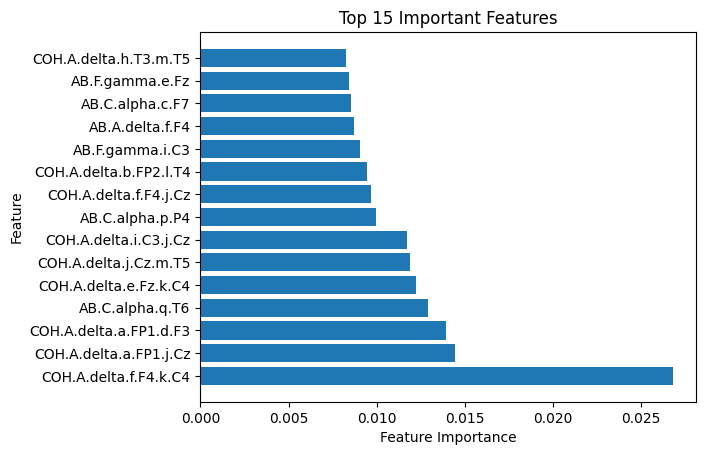

In [62]:
importances = rf.feature_importances_
feature_names = X.columns
copy_feature_names = feature_names

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

top_15_features = feature_importance_df.head(15)

plt.barh(top_15_features['feature'], top_15_features['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Important Features")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipython-input-63-3413476504.py:53: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')


Optimization terminated successfully.
         Current function value: 0.570510
         Iterations 6


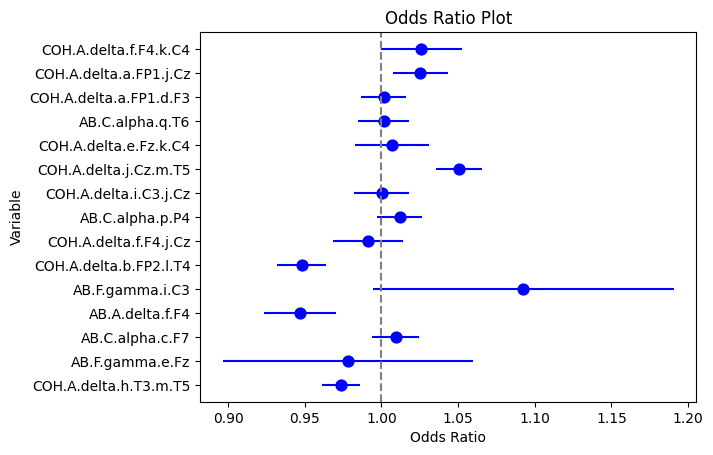

In [63]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

data1 = pd.read_csv('/content/Sheet 1-numericBehaviorWithAgeOnly.csv')
Y = data1['specific_disorder']

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(data1[top_15_features['feature']])
data = pd.DataFrame(data2)


import pandas as pd
from sklearn.linear_model import LogisticRegression

feature_names = top_15_features['feature'].tolist()
X = pd.DataFrame(data2, columns=feature_names)

y = data1['specific_disorder'].apply(lambda x: 1 if x == 4 else 0)

model = LogisticRegression()
model.fit(X, y)

import numpy as np

coefficients = model.coef_[0]

odds_ratios = np.exp(coefficients)


import statsmodels.api as sm
X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()
std_err = result.bse.values[1:]


import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame({'Odds Ratio': odds_ratios, 'Variable': feature_names})
lower_bound = odds_ratios - std_err
upper_bound = odds_ratios + std_err

df['Lower Bound'] = lower_bound
df['Upper Bound'] = upper_bound

fig, ax = plt.subplots()

sns.pointplot(data=df, x='Odds Ratio', y='Variable', join=False, ax=ax, color='blue', marker='o')

ax.errorbar(
    x=df['Odds Ratio'],
    y=df['Variable'],
    xerr=[df['Odds Ratio'] - df['Lower Bound'], df['Upper Bound'] - df['Odds Ratio']],
    fmt='|',
    color='blue'
)

plt.axvline(1, linestyle='--', color='gray')
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.title('Odds Ratio Plot')
plt.show()


/tmp/ipython-input-64-4122483304.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1['sex'] = data1['sex'].replace({'M': 1, 'F': 2})


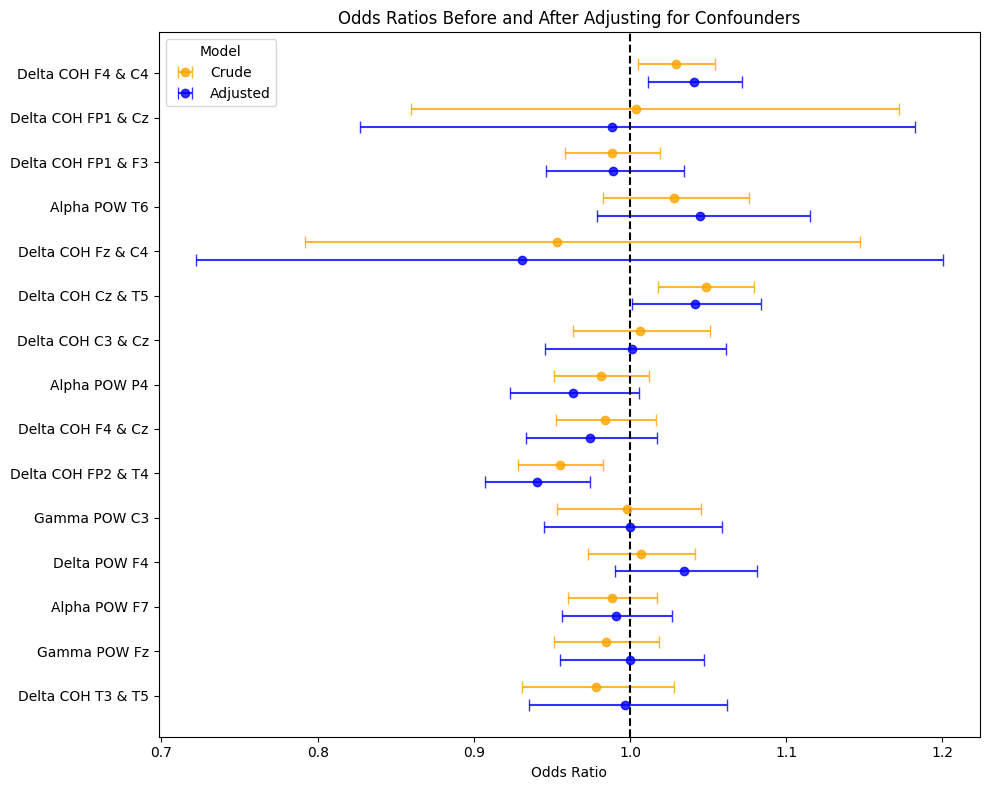

In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

data1 = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
data1 = data1[data1['specific_disorder'].isin(['Behavioral addiction disorder', 'Healthy control'])]
data1['sex'] = data1['sex'].replace({'M': 1, 'F': 2})

confounders = ['age', 'sex', 'IQ', 'education']
data1 = data1.dropna(subset=confounders)

y = data1['specific_disorder'].apply(lambda x: 1 if x == "Behavioral addiction disorder" else 0).reset_index(drop=True)

feature_names = top_15_features['feature'].tolist()
all_features = feature_names + confounders

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data2 = imp_mean.fit_transform(data1[all_features])
X_all = pd.DataFrame(data2, columns=all_features)

Xc = sm.add_constant(X_all[feature_names])
model_crude = sm.Logit(y, Xc).fit(disp=0)
or_crude = np.exp(model_crude.params[1:])
ci_crude = np.exp(model_crude.conf_int().iloc[1:])

Xa = sm.add_constant(X_all[all_features])
model_adj = sm.Logit(y, Xa).fit(disp=0)
or_adj = np.exp(model_adj.params[1:])
ci_adj = np.exp(model_adj.conf_int().iloc[1:])

name_map = {
    'COH.A.delta.f.F4.k.C4': 'Delta COH F4 & C4',
    'COH.A.delta.j.Cz.m.T5': 'Delta COH Cz & T5',
    'COH.A.delta.f.F4.h.T3': 'Delta COH F4 & T3',
    'COH.A.delta.b.FP2.l.T4': 'Delta COH FP2 & T4',
    'COH.A.delta.a.FP1.j.Cz': 'Delta COH FP1 & Cz',
    'COH.A.delta.a.FP1.d.F3': 'Delta COH FP1 & F3',
    'AB.C.alpha.q.T6': 'Alpha POW T6',
    'COH.A.delta.e.Fz.k.C4': 'Delta COH Fz & C4',
    'COH.A.delta.i.C3.j.Cz': 'Delta COH C3 & Cz',
    'AB.C.alpha.p.P4': 'Alpha POW P4',
    'COH.A.delta.h.T3.m.T5': 'Delta COH T3 & T5',
    'COH.A.delta.f.F4.j.Cz': 'Delta COH F4 & Cz',
    'AB.F.gamma.i.C3': 'Gamma POW C3',
    'AB.F.gamma.e.Fz': 'Gamma POW Fz',
    'AB.A.delta.f.F4': 'Delta POW F4',
    'AB.C.alpha.c.F7': 'Alpha POW F7',
}

def create_df(odds_ratios, ci, label, offset):
    return pd.DataFrame({
        'Variable': odds_ratios.index.map(lambda x: name_map.get(x, x)),
        'Odds Ratio': odds_ratios.values,
        'Lower Bound': ci[0].values,
        'Upper Bound': ci[1].values,
        'Model': label,
        'Offset': offset
    })

df_crude = create_df(or_crude, ci_crude, 'Crude', -0.2)
df_adj = create_df(or_adj.loc[feature_names], ci_adj.loc[feature_names], 'Adjusted', 0.2)

df_plot = pd.concat([df_crude, df_adj], ignore_index=True)

df_plot['Feature'] = pd.Categorical(df_plot['Variable'], categories=[name_map.get(f, f) for f in feature_names], ordered=True)
df_plot = df_plot.sort_values(by='Feature', ascending=False)

plt.figure(figsize=(10, 8))
for model, color in zip(['Crude', 'Adjusted'], ['orange', 'blue']):
    subset = df_plot[df_plot['Model'] == model]
    plt.errorbar(
        x=subset['Odds Ratio'],
        y=np.arange(len(subset)) + subset['Offset'],
        xerr=[subset['Odds Ratio'] - subset['Lower Bound'], subset['Upper Bound'] - subset['Odds Ratio']],
        fmt='o',
        label=model,
        color=color,
        capsize=4,
        alpha=0.8,
        markersize=6
    )

plt.yticks(ticks=np.arange(len(df_crude)), labels=df_crude['Variable'])
plt.axvline(1, linestyle='--', color='black')
plt.xlabel('Odds Ratio')
plt.title('Odds Ratios Before and After Adjusting for Confounders')
plt.legend(title='Model')
plt.tight_layout()
plt.gca().invert_yaxis()
plt.show()



In [65]:
import pandas as pd
import numpy as np

column_name = "Feature"

name_map = {
    'COH.A.delta.f.F4.k.C4': 'Delta COH F4 & C4',
    'COH.A.delta.j.Cz.m.T5': 'Delta COH Cz & T5',
    'COH.A.delta.f.F4.h.T3': 'Delta COH F4 & T3',
    'COH.A.delta.b.FP2.l.T4': 'Delta COH FP2 & T4',
    'COH.A.delta.a.FP1.j.Cz' : 'Delta COH FP1 & Cz',
    'COH.A.delta.a.FP1.d.F3' : 'Delta COH FP1 & F3',
    'AB.C.alpha.q.T6' : 'Alpha POW T6',
    'COH.A.delta.e.Fz.k.C4' : 'Delta COH Fz & C4',
    'COH.A.delta.i.C3.j.Cz' : 'Delta COH C3 & Cz',
    'AB.C.alpha.p.P4' : 'Alpha POW P4',
    'COH.A.delta.h.T3.m.T5' : 'Delta COH T3 & T5',
    'COH.A.delta.f.F4.j.Cz' : 'Delta COH F4 & Cz',
    'AB.F.gamma.i.C3' : 'Gamma POW C3',
    'AB.F.gamma.e.Fz' : 'Gamma POW Fz',
    'AB.A.delta.f.F4' : 'Delta POW F4' ,
    'AB.C.alpha.c.F7'  : 'Alpha POW F7' ,


}

adjusted_odds_ratios = np.exp(model_adj.params[1:])
conf_int_adj = np.exp(model_adj.conf_int().iloc[1:])
p_values_adj = model_adj.pvalues.iloc[1:]

summary_df = pd.DataFrame({
    'Variable': adjusted_odds_ratios.index,
    'Adjusted Odds Ratio': adjusted_odds_ratios.values,
    'Lower 95% CI': conf_int_adj[0].values,
    'Upper 95% CI': conf_int_adj[1].values,
    'p-value': p_values_adj.values,
})

summary_df = summary_df[summary_df['Variable'].isin(feature_names)]

summary_df['Variable'] = summary_df['Variable'].map(name_map).fillna(summary_df['Variable'])

summary_df = summary_df.rename(columns={'Variable': column_name})

styled_df = summary_df.style \
    .hide(axis="index") \
    .set_table_styles([
        {
            'selector': 'thead th',
            'props': [
                ('border-top', '2px solid black'),
                ('border-bottom', '2px solid black'),
                ('background-color', 'white'),
                ('text-align', 'center'),
                ('padding', '6px')
            ]
        },
        {
            'selector': 'tbody td',
            'props': [
                ('border', 'none'),
                ('background-color', 'white'),
                ('text-align', 'center'),
                ('padding', '6px')
            ]
        },
        {
            'selector': 'tbody tr:last-child td',
            'props': [('border-bottom', '2px solid black')]
        },
        {
            'selector': '',
            'props': [('border', 'none')]
        }
    ]) \
    .format(precision=2) \
    .set_caption("Adjusted Odds Ratios and Statistical Significance")

styled_df



Feature,Adjusted Odds Ratio,Lower 95% CI,Upper 95% CI,p-value
Delta COH F4 & C4,1.00,0.94,1.06,0.92
Delta COH FP1 & Cz,1.00,0.95,1.05,1.00
Delta COH FP1 & F3,0.99,0.96,1.03,0.61
Alpha POW T6,1.03,0.99,1.08,0.13
Delta COH Fz & C4,1.00,0.94,1.06,0.99
Delta COH Cz & T5,0.94,0.91,0.97,0.00
Delta COH C3 & Cz,0.97,0.93,1.02,0.23
Alpha POW P4,0.96,0.92,1.01,0.09
Delta COH F4 & Cz,1.00,0.95,1.06,0.96
Delta COH FP2 & T4,1.04,1.00,1.08,0.04


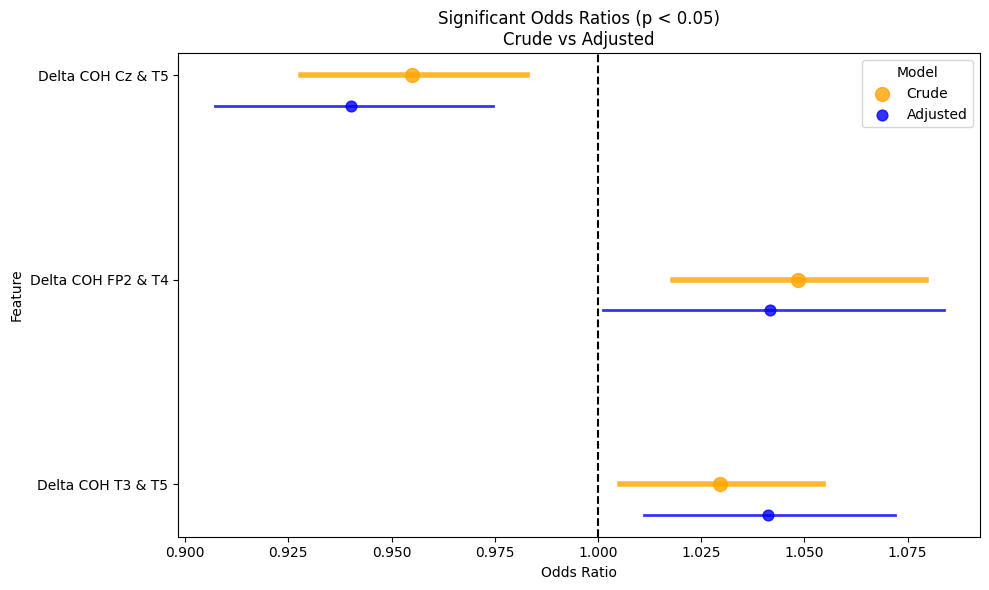

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_plot_sig = df_plot_sig.copy()

features = df_plot_sig['Variable'].unique()
feature_to_num = {feature: i for i, feature in enumerate(features)}

df_plot_sig['y_num'] = df_plot_sig['Variable'].map(feature_to_num)

offsets = {'Crude': 0, 'Adjusted': 0.15}

df_plot_sig['y_num_offset'] = df_plot_sig.apply(lambda row: row['y_num'] + offsets[row['Model']], axis=1)

plt.figure(figsize=(10, 6))

colors = {'Crude': 'orange', 'Adjusted': 'blue'}
sizes = {'Crude': 100, 'Adjusted': 60}

for model in ['Crude', 'Adjusted']:
    subset = df_plot_sig[df_plot_sig['Model'] == model]
    plt.scatter(subset['Odds Ratio'], subset['y_num_offset'],
                label=model,
                color=colors[model],
                s=sizes[model],
                alpha=0.8)

    for _, row in subset.iterrows():
        plt.plot([row['Lower Bound'], row['Upper Bound']],
                 [row['y_num_offset'], row['y_num_offset']],
                 color=colors[model],
                 linewidth=4 if model == 'Crude' else 2,
                 alpha=0.8)

plt.axvline(1, linestyle='--', color='black')
plt.yticks(ticks=range(len(features)), labels=features)
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Significant Odds Ratios (p < 0.05)\nCrude vs Adjusted')
plt.legend(title='Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [67]:
import pandas as pd

p_values = result.pvalues.values[1:]

df = pd.DataFrame({
    'Variable': feature_names,
    'Odds Ratio': odds_ratios,
    'p-value': p_values
})

df['Significant (p < 0.05)'] = df['p-value'] < 0.05



df = df.round(2)


from IPython.display import display

styled_df = df.style \
    .set_table_styles([
        {
            'selector': 'th',
            'props': [('border', '1px solid black'), ('border-collapse', 'collapse'), ('background-color', '#f9f9f9')]
        },
        {
            'selector': 'td',
            'props': [('border', '1px solid black'), ('border-collapse', 'collapse')]
        }
    ]) \
    .format(precision=2) \
    .set_properties(**{
        'text-align': 'center',
        'padding': '6px'
    }) \
    .set_caption("Significant Odds Ratios")

display(styled_df)

print(styled_df)

,Variable,Odds Ratio,p-value,Significant (p < 0.05)
0,COH.A.delta.f.F4.k.C4,1.03,0.32,False
1,COH.A.delta.a.FP1.j.Cz,1.03,0.24,False
2,COH.A.delta.a.FP1.d.F3,1.00,0.56,False
3,AB.C.alpha.q.T6,1.00,0.93,False
4,COH.A.delta.e.Fz.k.C4,1.01,0.67,False
5,COH.A.delta.j.Cz.m.T5,1.05,0.00,True
6,COH.A.delta.i.C3.j.Cz,1.00,0.39,False
7,AB.C.alpha.p.P4,1.01,0.43,False
8,COH.A.delta.f.F4.j.Cz,0.99,0.70,False
9,COH.A.delta.b.FP2.l.T4,0.95,0.00,True


## Muse Integration

In [68]:
user_data = pd.read_csv('/content/Anna mindMonitor_2025-01-18--11-37-00.csv')
data1 = pd.read_csv('/content/EEG.machinelearing_data_BRMH.csv')
data1 = data1[data1['specific_disorder'].isin(['Behavioral addiction disorder', 'Healthy control'])]

In [69]:
#Delta AF8-TP9 coherence - corresponds to COH.A.delta.f.F4.h.T3

from scipy import signal

data = pd.read_csv('/content/Anna mindMonitor_2025-01-18--11-37-00.csv')

channel_1 = data['Delta_AF8'].values
channel_2 = data['Delta_TP10'].values

channel_1 = np.nan_to_num(channel_1, nan=np.nanmean(channel_1))
channel_2 = np.nan_to_num(channel_2, nan=np.nanmean(channel_2))

fs = 256
f, Cxy = signal.coherence(channel_1, channel_2, fs=fs, nperseg=1024)  # fs is sampling frequency

coherence_data = pd.DataFrame({'Frequency': f, 'Coherence DeltaAF8DeltaTP10': Cxy})

coherence_AF8_TP10 = coherence_data['Coherence DeltaAF8DeltaTP10'].mean()
coherence_AF8_TP10 *=100
print(coherence_AF8_TP10)


45.12294617453831


In [70]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

data1['sex'] = data1['sex'].replace({'male': 1, 'female': 2})

confounders = ['age', 'sex', 'IQ', 'education']
data1 = data1.dropna(subset=confounders)

focus_var = ['COH.A.delta.j.Cz.m.T5']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 'Behavioral addiction disorder' else 0).astype(float)

X = data1[focus_var + confounders]
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

X_with_const = sm.add_constant(X)

logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()


Delta_TP9 = user_data['Delta_TP9'].values
Delta_TP9 = np.nan_to_num(Delta_TP9, nan=np.nanmean(Delta_TP9))
Delta_TP9_mean = Delta_TP9.mean()

prediction_data = pd.DataFrame(columns=X_with_const.columns)
prediction_data.loc[0] = 0

prediction_data.at[0, 'const'] = 1

prediction_data.at[0, 'COH.A.delta.j.Cz.m.T5'] = Delta_TP9_mean


for confounder in confounders:
    if confounder in prediction_data.columns:
        prediction_data.at[0, confounder] = data1[confounder].mean()

pred = result.get_prediction(prediction_data)

print(pred.predicted)

risk1 = pred.predicted


Optimization terminated successfully.
         Current function value: 0.450929
         Iterations 7
[0.19981345]


/tmp/ipython-input-70-4238720458.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7630260130520915' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prediction_data.at[0, 'COH.A.delta.j.Cz.m.T5'] = Delta_TP9_mean
/tmp/ipython-input-70-4238720458.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.569010989010987' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prediction_data.at[0, confounder] = data1[confounder].mean()
/tmp/ipython-input-70-4238720458.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '110.47802197802197' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prediction_data.at[0, confounder] = data1

In [71]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

data1['sex'] = data1['sex'].replace({'male': 1, 'female': 2})
confounders = ['age', 'sex', 'IQ', 'education']
data1 = data1.dropna(subset=confounders)
focus_var = ['COH.A.delta.b.FP2.l.T4']

Y = data1['specific_disorder'].apply(lambda x: 1 if x == 'Behavioral addiction disorder' else 0).astype(float)

X = data1[focus_var + confounders]
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)

X_with_const = sm.add_constant(X)

logit_model = sm.Logit(Y, X_with_const)
result = logit_model.fit()

AF8_TP10 = coherence_AF8_TP10
AF8_TP10 = np.nan_to_num(AF8_TP10, nan=np.nanmean(AF8_TP10))
AF8_TP10_mean = AF8_TP10.mean()

prediction_data = pd.DataFrame(columns=X_with_const.columns)
prediction_data.loc[0] = 0

prediction_data.at[0, 'const'] = 1
prediction_data.at[0, 'COH.A.delta.b.FP2.l.T4'] = AF8_TP10_mean

for confounder in confounders:
    if confounder in prediction_data.columns:
        prediction_data.at[0, confounder] = data1[confounder].mean()

pred = result.get_prediction(prediction_data)

print(pred.predicted)

risk2 = pred.predicted


Optimization terminated successfully.
         Current function value: 0.468918
         Iterations 7
[0.11055554]


/tmp/ipython-input-71-25780719.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '45.12294617453831' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prediction_data.at[0, 'COH.A.delta.b.FP2.l.T4'] = AF8_TP10_mean
/tmp/ipython-input-71-25780719.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.569010989010987' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prediction_data.at[0, confounder] = data1[confounder].mean()
/tmp/ipython-input-71-25780719.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '110.47802197802197' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  prediction_data.at[0, confounder] = data1[confou

In [72]:
if risk2 < 0.5:
  risk2 = -1*(0.5 - risk2)

if risk1 < 0.5:
  risk1 = -1*(0.5 - risk1)

if risk2 > 0.5:
  risk2 = (risk2-0.5)
if risk1 > 0.5:
  risk1 = (risk1-0.5)


risk_total = risk2 + risk1

if risk_total<0:
  print("You are " + str(risk_total*-100) +"% less likely to have IAD")
if risk_total>0:
  print("You are " + str(risk_total*100) +"% more likely to have IAD")
if risk_total==0:
  print("Prediction cannot be made.")

You are [68.9631015]% less likely to have IAD
